In [1]:
import gurobipy as gp

In [ ]:
edges = [
    ("X", "Z"),
    ("Z", "Y"),
    ("U1", "X"),
    ("U1", "Y"),
    ("U2", "Z"),
    ("X*", "Z*"),
    ("Z*", "Y*"),
    ("U1", "X*"),
    ("U1", "Y*"),
    ("U2", "Z*"),
    ("X_", "Z_"),
    ("Z_", "Y_"),
    ("U1", "X_"),
    ("U1", "Y_"),
    ("U2", "Z_"),
    ("Y*", "Yf"),
    ("Y_", "Yf"),
]

# PNS = P(Y* = 1, Y_ = 0)

'''
PN = P(Y0 = 0 | X = 1, Y = 1)
PS = P(Y1 = 1 | X = 0, Y = 0)
PNS = P(Y1 = 1, Y0 = 0)

PNS = sum_u1_u2 P(U1=u1, U2=u2) P(Y* = 1, Y_=0| u1, u2)
'''


X = "X"
Z = "Z"
U1 = "U1"
U1 = "U1"
U2 = "U2"
X = "X"
Z = "Z"
U1 = "U1"
U1 = "U1"
U2 = "U2"
X_ = "X_"
Z_ = "Z_"
U1 = "U1"
U1 = "U1"
U2 = "U2"
Y = "Y"
Y_ = "Y_"
Yf = "Yf"

variables = [X,
            Z,
            U1,
            U1,
            U2,
            X,
            Z,
            U1,
            U1,
            U2,
            X_,
            Z_,
            U1,
            U1,
            U2,
            Y,
            Y_,
            Yf,
]

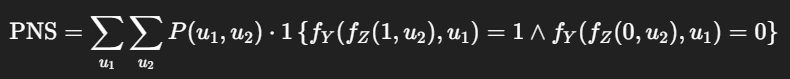

In [ ]:
model = gp.Model("linear")

number_of_vars_1 = len(decisionMatrix_1[0])
number_of_vars_2 = len(decisionMatrix_2[0])

vars = model.addVars(number_of_vars_1 + number_of_vars_2, obj=1, name="Variables")

constrs_1 = model.addConstrs(
    (gp.quicksum(decisionMatrix_1[i][j] * vars[j] for j in range(number_of_vars_1)) == probs_1[i]
    for i in range(len(probs_1))),
    name="Intervention_1_Related_Constraints"
)

constrs_2 = model.addConstrs(
    (gp.quicksum(decisionMatrix_2[i][j] * vars[j + number_of_vars_1] for j in range(number_of_vars_2)) == probs_2[i]
    for i in range(len(probs_2))),
    name="Intervention_2_Related_Constraints"
)

model.setObjective(
    gp.quicksum(objFunctionCoefficients[i][j] * vars[i] * vars[j] for i in range(number_of_vars_1) for j in range(number_of_vars_2)),
)

model.params.outputFlag = 0

model.modelSense = gp.GRB.MINIMIZE
model.optimize()
duals_1 = model.getAttr("pi", constrs_1)
duals_2 = model.getAttr("pi", constrs_2)
print(f"duals: {duals_1}, {duals_2}")
if model.Status == gp.GRB.OPTIMAL: # OPTIMAL
        lower = model.objVal
        print(f"Minimal solution found! -- MIN Query: {lower}")
else:
    print(f"Minimal solution not found. Gurobi status code: {model.Status}")
    lower = None


model.modelSense = gp.GRB.MAXIMIZE
model.optimize()
duals_1 = model.getAttr("pi", constrs_1)
duals_2 = model.getAttr("pi", constrs_2)
print(f"duals: {duals_1}, {duals_2}")
if model.Status == gp.GRB.OPTIMAL: # OPTIMAL
        upper = model.objVal
        print(f"Maximal solution found! -- MAX Query: {upper}")
else:
    print(f"Maximal solution not found. Gurobi status code: {model.Status}")
    upper = None

print(f"Query interval = [{lower, upper}]")
